# Open Government Data, Canton Zurich

### **Dataset**: Ausländische Wohnbevölkerung mit Schutzstatus S im Kanton Zürich, 10-Jahres-Altersklassen und Geschlecht

### **Description**: Die Daten werden monatlich aktualisiert (jeweils ungefähr am 15. Tag des Folgemonats). Die Quelldaten stammen aus dem Zentralen Migrationsinformationssystem ZEMIS des Staatssekretariats für Migration SEM.

*Autogenerated Jupyter Notebook and basic Python code for data set* **1541@statistisches-amt-kanton-zuerich**.

## Dataset profile
- **Issued** `2022-07-04T13:59:28`
- **Modified** `2022-12-20T08:30:45`
- **Startdate** `2022-03-01`
- **Enddate** `2022-11-30`
- **Theme** `['Bevölkerung']`
- **Keyword** `['aufenthalt', 'fluechtlinge', 'kanton_zuerich', 'einwohner', 'ogd', 'bevoelkerungsbestand']`
- **Publisher** `['Statistisches Amt des Kantons Zürich']`
- **Landingpage** `None`


## Import Python modules

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

params = {
    'text.color': (0.25, 0.25, 0.25),
    'figure.figsize': [18, 6],
   }

plt.rcParams.update(params)

import pandas as pd 

## Load data

- The dataset has **`1` distribution(s)** in CSV format.
- All available CSV distributions are listed below and can be read into a pandas dataframe.

In [2]:
# Distribution 0
# Ktzhdistid               : 2958
# Title                    : Bestandesdaten der ausländischen Wohnbevölkerung im Kanton Zürich mit Aufenthaltsstatus 'Schutzbedürftige'
# Description              : Aus Datenschutzgründen werden Zellenwerte, in deren Berechnung Merkmale mit weniger als drei Fällen eingehen, als '-' angegeben.
# Issued                   : 2022-07-04T13:59:28
# Modified                 : 2022-12-20T08:30:21
# Rights                   : NonCommercialAllowed-CommercialAllowed-ReferenceRequired

df = pd.read_csv('https://www.web.statistik.zh.ch/ogd/daten/ressourcen/KTZH_00001541_00002958.csv', on_bad_lines='warn', encoding_errors='ignore')
if df.shape[1] <= 1:
    df = pd.read_csv('https://www.web.statistik.zh.ch/ogd/daten/ressourcen/KTZH_00001541_00002958.csv', sep=';', on_bad_lines='warn', encoding_errors='ignore')

## Analyze data

In [3]:
# drop columns that have no values
df.dropna(how='all', axis=1, inplace=True)

In [4]:
print(f'The dataset has {df.shape[0]:,.0f} rows (observations) and {df.shape[1]:,.0f} columns (variables).')
print(f'There seem to be {df.duplicated().sum()} exact duplicates in the data.')

The dataset has 468 rows (observations) and 8 columns (variables).
There seem to be 0 exact duplicates in the data.


In [5]:
df.info(memory_usage='deep', verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Jahr               468 non-null    int64 
 1   Monat              468 non-null    object
 2   Region             468 non-null    object
 3   Geschlecht         468 non-null    object
 4   Altersklasse       468 non-null    object
 5   Aufenthaltsstatus  468 non-null    object
 6   Wert               468 non-null    object
 7   Einheit            468 non-null    object
dtypes: int64(1), object(7)
memory usage: 259.6 KB


In [6]:
df.head()

,Jahr,Monat,Region,Geschlecht,Altersklasse,Aufenthaltsstatus,Wert,Einheit
0,2022,Jan,Kanton Zürich,Männlich,0 bis 9 Jahre,Schutzbedürftige,-,Anz. Personen
1,2022,Feb,Kanton Zürich,Männlich,0 bis 9 Jahre,Schutzbedürftige,-,Anz. Personen
2,2022,Mrz,Kanton Zürich,Männlich,0 bis 9 Jahre,Schutzbedürftige,345,Anz. Personen
3,2022,Apr,Kanton Zürich,Männlich,0 bis 9 Jahre,Schutzbedürftige,700,Anz. Personen
4,2022,Mai,Kanton Zürich,Männlich,0 bis 9 Jahre,Schutzbedürftige,768,Anz. Personen


In [7]:
# display a small random sample transposed in order to see all variables
df.sample(3).T

,195,261,397
Jahr,2022,2022,2022
Monat,Apr,Okt,Feb
Region,Kanton Zürich,Kanton Zürich,Kanton Zürich
Geschlecht,Weiblich,Weiblich,Total
Altersklasse,30 bis 39 Jahre,80 bis 89 Jahre,70 bis 79 Jahre
Aufenthaltsstatus,Schutzbedürftige,Schutzbedürftige,Schutzbedürftige
Wert,1202,74,-
Einheit,Anz. Personen,Anz. Personen,Anz. Personen


In [8]:
# describe non-numerical features
with pd.option_context('display.float_format', '{:,.2f}'.format):
    display(df.describe(exclude='number'))

,Monat,Region,Geschlecht,Altersklasse,Aufenthaltsstatus,Wert,Einheit
count,468,468,468,468,468,468,468
unique,12,1,3,13,1,254,1
top,Jan,Kanton Zürich,Männlich,0 bis 9 Jahre,Schutzbedürftige,-,Anz. Personen
freq,39,468,156,36,468,182,468


In [9]:
# describe numerical features
with pd.option_context('display.float_format', '{:,.2f}'.format):
    display(df.describe(include='number'))

,Jahr
count,468.00
mean,"2,022.00"
std,0.00
min,"2,022.00"
25%,"2,022.00"
50%,"2,022.00"
75%,"2,022.00"
max,"2,022.00"


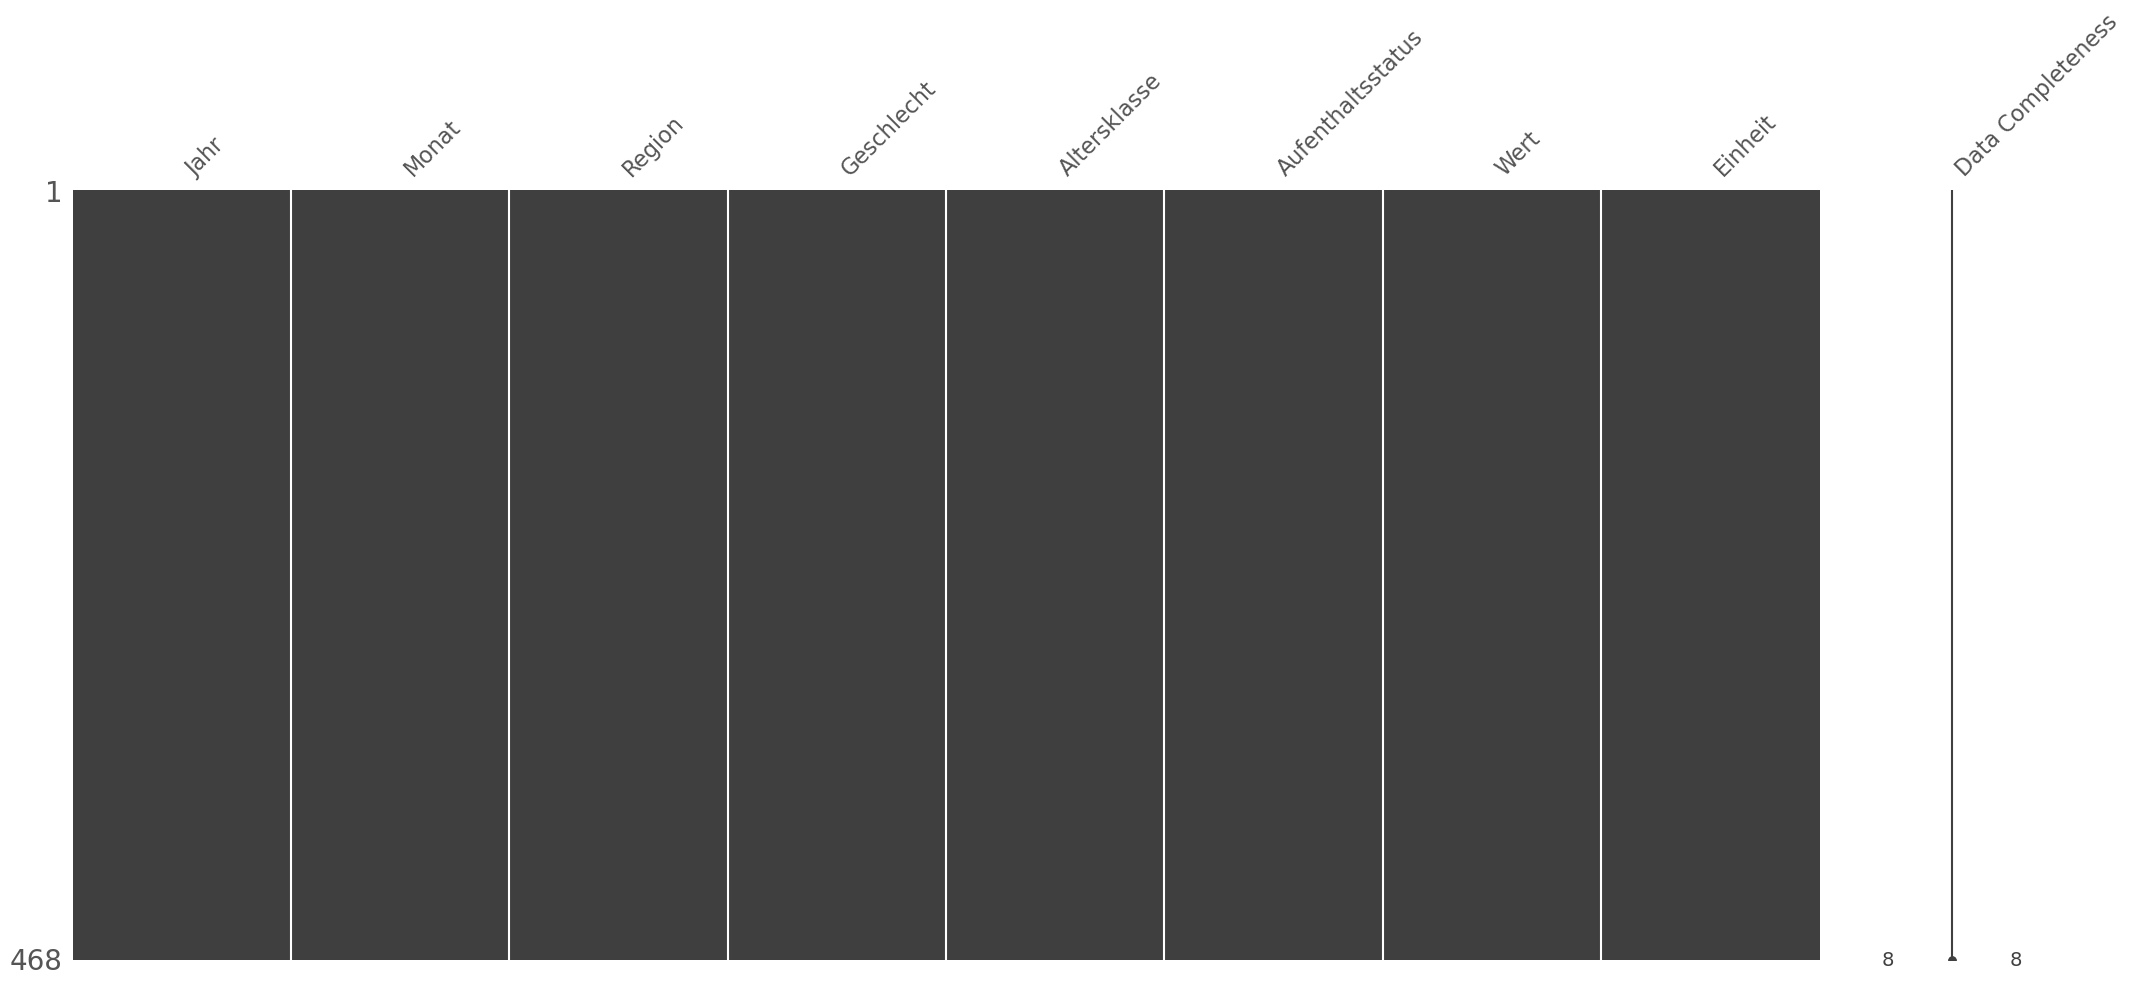

In [10]:
# check missing values with missingno
# https://github.com/ResidentMario/missingno
import missingno as msno
msno.matrix(df, labels=True, sort='descending');

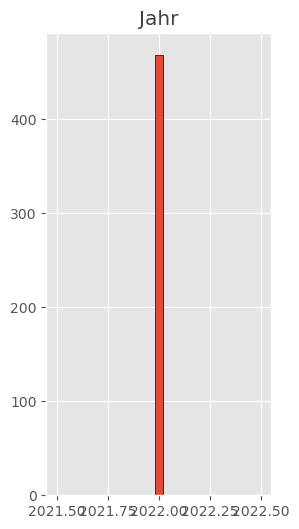

In [11]:
# plot a histogram for each numerical feature
df.hist(bins=25, layout=(-1, 5), edgecolor='black');

In [12]:
# continue your code here...

**Contact**: Statistisches Amt des Kantons Zürich | Data Shop | datashop@statistik.zh.ch